In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-08-10 05:02:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.65MB/s    in 49s     

2020-08-10 05:03:42 (6.33 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
dir = ['rock','paper','scissors']
for i in dir:
  print(len(os.listdir('/tmp/rockpaperscissors/'+i)))
# print(os.listdir('/tmp/rockpaperscissors'))

726
712
750


In [ ]:
dir2 = ['training','testing']
try:
    os.mkdir('/tmp/images')
    for x in dir2:
      os.mkdir('/tmp/images/'+x)
      for i in dir:
        os.mkdir('/tmp/images/'+x+'/'+i)

except OSError:
    pass

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
 
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
 
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
 
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
 
 
ROCK_SOURCE_DIR = "/tmp/rockpaperscissors/rock/"
TRAINING_ROCK_DIR = "/tmp/images/training/rock/"
TESTING_ROCK_DIR = "/tmp/images/testing/rock/"
PAPER_SOURCE_DIR = "/tmp/rockpaperscissors/paper/"
TRAINING_PAPER_DIR = "/tmp/images/training/paper/"
TESTING_PAPER_DIR = "/tmp/images/testing/paper/"
SCISSORS_SOURCE_DIR = "/tmp/rockpaperscissors/scissors/"
TRAINING_SCISSORS_DIR = "/tmp/images/training/scissors/"
TESTING_SCISSORS_DIR = "/tmp/images/testing/scissors/"
 
split_size = .9
split_data(ROCK_SOURCE_DIR, TRAINING_ROCK_DIR, TESTING_ROCK_DIR, split_size)
split_data(PAPER_SOURCE_DIR, TRAINING_PAPER_DIR, TESTING_PAPER_DIR, split_size)
split_data(SCISSORS_SOURCE_DIR, TRAINING_SCISSORS_DIR, TESTING_SCISSORS_DIR, split_size)

In [ ]:
print(len(os.listdir('/tmp/images/training/rock/')))
print(len(os.listdir('/tmp/images/training/paper/')))
print(len(os.listdir('/tmp/images/training/scissors/')))
print(len(os.listdir('/tmp/images/testing/rock/')))
print(len(os.listdir('/tmp/images/testing/paper/')))
print(len(os.listdir('/tmp/images/testing/scissors/')))

718
703
744
140
142
139


In [ ]:
base_dir = '/tmp/images'
training_dir = os.path.join(base_dir, 'training')
testing_dir = os.path.join(base_dir, 'testing')

In [ ]:
os.listdir('/tmp/images/training')

['paper', 'rock', 'scissors']

In [ ]:
os.listdir('/tmp/images/testing')

['paper', 'rock', 'scissors']

In [ ]:
#direktori data training
train_rock_dir = os.path.join(training_dir, 'rock')
train_paper_dir = os.path.join(training_dir, 'paper')
train_scissors_dir = os.path.join(training_dir, 'scissors')

#direktori data testing
test_rock_dir = os.path.join(testing_dir, 'rock')
test_paper_dir = os.path.join(testing_dir, 'paper')
test_scissors_dir = os.path.join(testing_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        training_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=25,
        # karena kita merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        testing_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=10, 
        class_mode='categorical')

Found 2165 images belonging to 3 classes.
Found 421 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=10,
      validation_data=test_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=10,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/10
25/25 - 31s - loss: 1.1013 - accuracy: 0.3536 - val_loss: 1.0253 - val_accuracy: 0.4600
Epoch 2/10
25/25 - 31s - loss: 0.8530 - accuracy: 0.5952 - val_loss: 0.4651 - val_accuracy: 0.8300
Epoch 3/10
25/25 - 31s - loss: 0.4225 - accuracy: 0.8480 - val_loss: 0.4159 - val_accuracy: 0.8400
Epoch 4/10
25/25 - 31s - loss: 0.3465 - accuracy: 0.8732 - val_loss: 0.2582 - val_accuracy: 0.9300
Epoch 5/10
25/25 - 31s - loss: 0.2614 - accuracy: 0.9104 - val_loss: 0.2331 - val_accuracy: 0.9200
Epoch 6/10
25/25 - 31s - loss: 0.2520 - accuracy: 0.9088 - val_loss: 0.0919 - val_accuracy: 0.9700
Epoch 7/10
25/25 - 31s - loss: 0.2261 - accuracy: 0.9184 - val_loss: 0.2307 - val_accuracy: 0.9100
Epoch 8/10
25/25 - 30s - loss: 0.1464 - accuracy: 0.9447 - val_loss: 0.1236 - val_accuracy: 0.9700
Epoch 9/10
25/25 - 30s - loss: 0.1763 - accuracy: 0.9317 - val_loss: 0.1495 - val_accuracy: 0.9400
Epoch 10/10
25/25 - 31s - loss: 0.1645 - accuracy: 0.9301 - val_loss: 0.0632 - val_accuracy: 0.9700


Saving images (1).jpg to images (1) (1).jpg
paper


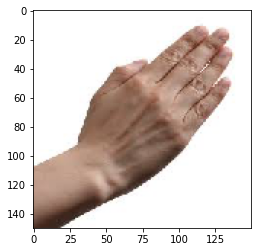

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  # print(classes)
  for kelas in classes:
    if (kelas[0]==1).all():
      print('paper')
    elif (kelas[1]==1).all():
      print('rock')
    else:
      print('scissors')